<a href="https://colab.research.google.com/github/Umeshahnn/Machine_Learning/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving housing (1).csv to housing (1) (1).csv


In [ ]:
#Display the first 10 rows and data types of all attributes.
import pandas as pd

df = pd.read_csv("housing (1).csv")
df.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [16]:
#Compute basic statistics (mean, median, std, min, max) for numeric attributes.

numeric_df = df.select_dtypes(include=["int64", "float64"])





basic_stats = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Std_Deviation": numeric_df.std(),
    "Minimum": numeric_df.min(),
    "Maximum": numeric_df.max()
})

basic_stats


,Mean,Median,Std_Deviation,Minimum,Maximum
longitude,-119.569704,-118.4900,2.003532,-124.3500,-114.3100
latitude,35.631861,34.2600,2.135952,32.5400,41.9500
housing_median_age,28.639486,29.0000,12.585558,1.0000,52.0000
total_rooms,2635.763081,2127.0000,2181.615252,2.0000,39320.0000
total_bedrooms,537.870553,435.0000,421.385070,1.0000,6445.0000
population,1425.476744,1166.0000,1132.462122,3.0000,35682.0000
households,499.539680,409.0000,382.329753,1.0000,6082.0000
median_income,3.870671,3.5348,1.899822,0.4999,15.0001
median_house_value,206855.816909,179700.0000,115395.615874,14999.0000,500001.0000


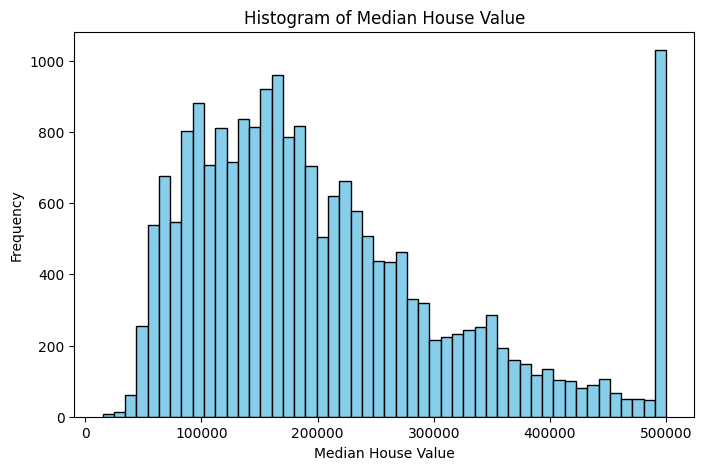

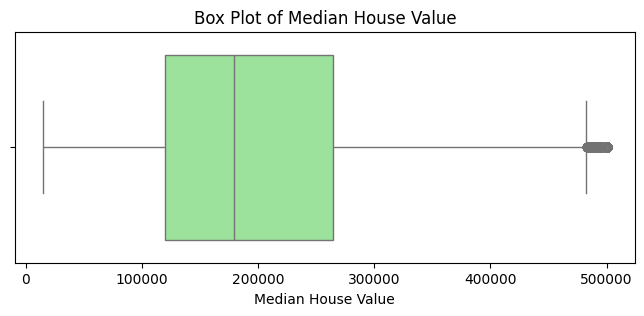

In [14]:
#Examine the distribution of the target variable (median_house_value) using a histogram and box plot.

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
plt.hist(df["median_house_value"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Median House Value")
plt.show()


plt.figure(figsize=(8,3))
sns.boxplot(x=df["median_house_value"], color="lightgreen")
plt.xlabel("Median House Value")
plt.title("Box Plot of Median House Value")
plt.show()


In [18]:
#• Identify any missing data values and list the percentage of missing values per column.
missing_count = df.isnull().sum()
missing_count


missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing_count,
    "Percentage (%)": missing_percentage
})

missing_summary


,Missing Values,Percentage (%)
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [24]:
#Handle missing values in total_bedrooms using an appropriate imputation strategy and justify your choice.
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

# Print results
print(df["total_bedrooms"].head())
print("Missing values after imputation:", df["total_bedrooms"].isna().sum())
print("Median used for imputation:", imputer.statistics_[0])



0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64
Missing values after imputation: 0
Median used for imputation: 435.0


In [26]:
#Encode the categorical attribute ocean_proximity using one-hot encoding.
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assume df is already loaded

# 1️⃣ Handle missing values in total_bedrooms
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

# 2️⃣ One-hot encode ocean_proximity
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ocean_encoded = encoder.fit_transform(df[["ocean_proximity"]])
ocean_df = pd.DataFrame(ocean_encoded, columns=encoder.get_feature_names_out(["ocean_proximity"]))

# 3️⃣ Combine back into the dataframe
df = pd.concat([df.drop("ocean_proximity", axis=1), ocean_df], axis=1)

# 4️⃣ Print results
print("First 5 rows after preprocessing:")
print(df.head())
print("\nMissing values in total_bedrooms:", df["total_bedrooms"].isna().sum())
print("Median used for total_bedrooms imputation:", imputer.statistics_[0])
print("\nOne-hot encoded columns added:", ocean_df.columns.tolist())

First 5 rows after preprocessing:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0

In [29]:
''' Perform feature scaling (MinMax scaler) on all numeric features.
minmax_scaler = MinMaxScaler(feature_range=(0, 1)'''


import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 3️⃣ Perform Min-Max scaling on all numeric features
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# 4️⃣ Print results
print("First 5 rows after preprocessing and scaling:")
print(df.head())
print("\nColumns scaled:", numeric_features.tolist())

First 5 rows after preprocessing and scaling:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  \
0    0.008941    0.020556       0.539668            0.902266   
1    0.067210    0.186976       0.538027            0.708247   
2    0.013818    0.028943       0.466028            0.695051   
3    0.015555    0.035849       0.354699            0.672783   
4    0.015752    0.042427       0.230776            0.674638   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0          

In [31]:
#Split the dataset into training (80%) and test (20%) sets using stratified sampling on the median_income attribute.
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assume df is already preprocessed (imputation, encoding, scaling done)

# 1️⃣ Create income categories for stratified sampling
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6.0, float("inf")],
    labels=[1, 2, 3, 4, 5],
    right=False # Ensure 0.0 values are included in the first bin
)

# 2️⃣ Stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index].drop("income_cat", axis=1)
    strat_test_set = df.loc[test_index].drop("income_cat", axis=1)

# 3️⃣ Print sizes to verify
print("Training set size:", strat_train_set.shape)
print("Test set size:", strat_test_set.shape)


Training set size: (16512, 14)
Test set size: (4128, 14)


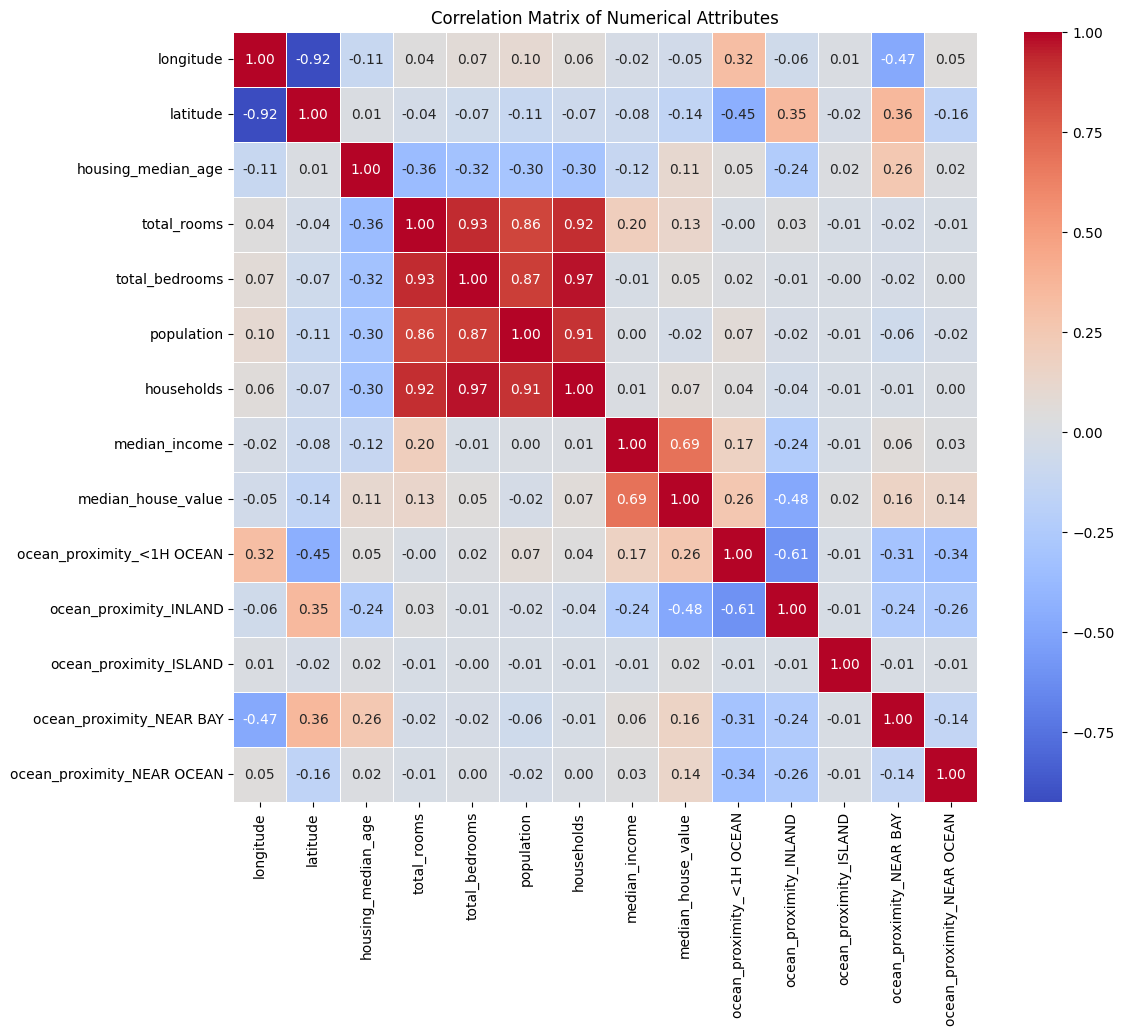

In [32]:
#Construct the correlation matrix for all numerical attributes in the California Housing dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [34]:
# Analyze the top correlated features with 'median_house_value'

# Extract correlations with the target variable 'median_house_value'
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)

# Display the top correlated features (excluding itself)
print("Top correlated features with median_house_value:")
print(correlation_with_target.drop('median_house_value'))


Top correlated features with median_house_value:
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


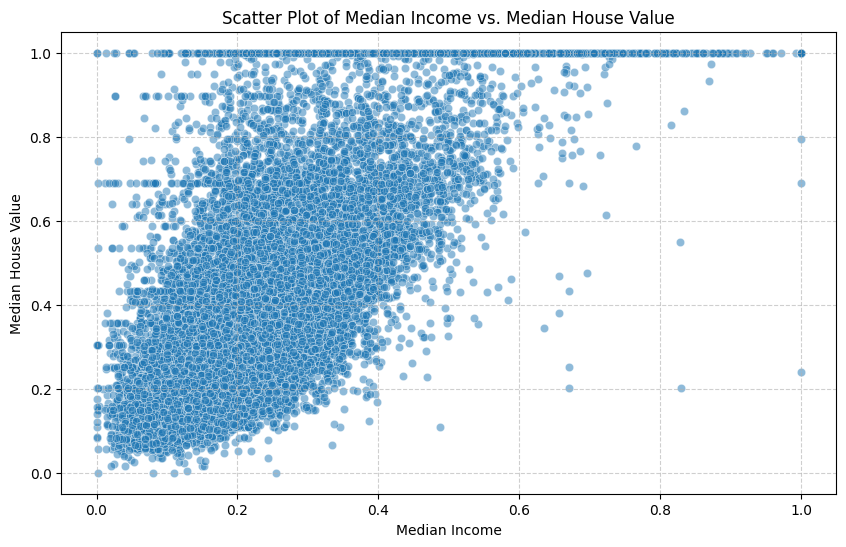

In [37]:
# Plot a scatter diagram between median_income and median_house_value.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [39]:
# Divide the dataset into 80% training and 20% testing sets using random sampling.
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets using random sampling
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Training set size:", train_set.shape)
print("Test set size:", test_set.shape)

Training set size: (16512, 15)
Test set size: (4128, 15)


In [44]:
'''• Identify:
• The top three features most positively correlated with
median_house_value'''

X_train = strat_train_set[['median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR BAY']]
y_train = strat_train_set['median_house_value']

X_test = strat_test_set[['median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR BAY']]
y_test = strat_test_set['median_house_value']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 3)
Shape of y_train: (16512,)
Shape of X_test: (4128, 3)
Shape of y_test: (4128,)


In [52]:
import pandas as pd

# Exclude 'median_house_value' itself from the correlation series
correlation_filtered = correlation_with_target.drop('median_house_value')

# Identify the top three most positively correlated features
top_3_positive_corr = correlation_filtered.head(3)

# Identify the single most negatively correlated feature
most_negative_corr = correlation_filtered.tail(1)

print("\nTop 3 features most positively correlated with median_house_value:")
print(top_3_positive_corr)

print("\nSingle most negatively correlated feature with median_house_value:")
print(most_negative_corr)


Top 3 features most positively correlated with median_house_value:
median_income                0.688075
ocean_proximity_<1H OCEAN    0.256617
ocean_proximity_NEAR BAY     0.160284
Name: median_house_value, dtype: float64

Single most negatively correlated feature with median_house_value:
ocean_proximity_INLAND   -0.484859
Name: median_house_value, dtype: float64


In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame
# Separate features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns

# Correlation with target
correlations = df.corr()['median_house_value'].sort_values(ascending=False)

print("Top 3 features most positively correlated with median_house_value:")
print(correlations[1:4])  # skip the first one since it's the target itself

print("\nMost negatively correlated feature:")
print(correlations[-1:])

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


Top 3 features most positively correlated with median_house_value:
median_income                0.688075
ocean_proximity_<1H OCEAN    0.256617
ocean_proximity_NEAR BAY     0.160284
Name: median_house_value, dtype: float64

Most negatively correlated feature:
income_cat   NaN
Name: median_house_value, dtype: float64

Evaluation Metrics:
RMSE: 0.14
MAE: 0.10
R2 Score: 0.63
